<a href="https://colab.research.google.com/github/chatmethar-comp/CondoRegressionModel/blob/main/linearCondoRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
x = np.array([35,47,42,44,45,45,50,42,43,44,40,41,37,39,32,36])
y = np.array([2911,4000,3822,3900,3894,4102,4264,3714,3954,4000,3789,3900,2985,3951,1920,3544])
x = x.reshape(-1,1)

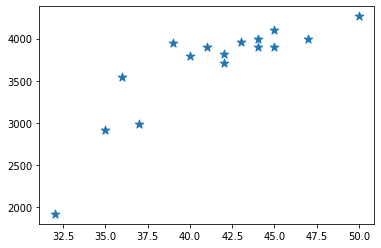

In [35]:
import matplotlib.pyplot as plt
plt.scatter(x,y, s=80, marker = '*')
plt.show()

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
LR = LinearRegression(normalize=True)
LR.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [38]:
y_pred = LR.predict(x)
print(y_pred)
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y,y_pred))
print("rmse root mean sqare error =",rmse)

r2 = r2_score(y,y_pred)
print("R2 = ",r2)

[2989.19213483 4262.47752809 3731.94194757 3944.15617978 4050.26329588
 4050.26329588 4580.7988764  3731.94194757 3838.04906367 3944.15617978
 3519.72771536 3625.83483146 3201.40636704 3413.62059925 2670.87078652
 3095.29925094]
rmse root mean sqare error = 303.9152760843936
R2 =  0.7177248113014503


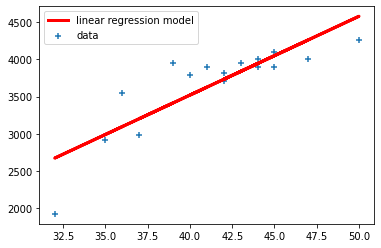

In [39]:
plt.scatter(x,y,marker= '+',label = 'data')
plt.plot(x,y_pred,linewidth=3,color = 'r',label = 'linear regression model')
plt.legend(loc = 'best')
plt.show()

In [40]:
data_predict = [63]
print("63 m2 area cost",LR.predict([data_predict])[0],"thousand bath","\nposibility {:.2f}%".format(r2_score(y,y_pred)*100))

63 m2 area cost 5960.191385767791 thousand bath 
posibility 71.77%


## **Boston data**

In [41]:
from sklearn import datasets
boston = datasets.load_boston()

In [43]:
x = boston.data
y = boston.target
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


In [51]:
LRboston = LinearRegression(normalize=True)

In [59]:
LRboston.fit(X_train,y_train)
y_predboston = LRboston.predict(X_test)
print(y_predboston)

[34.99429595 30.41033161 25.04938175 29.63979244 19.60409337 19.43254371
 43.48951436 17.11612922 26.29086093 19.04829414 24.10667593 14.97274029
 19.18460834 23.48411211 23.99594803 18.10861626 14.53460088 22.94994526
 22.18674027 16.28184521 20.14253704 20.20337017 27.71887414 16.81334423
 17.26173518 20.70041505 20.38237857 33.80277274 36.12082893 34.20351672
 17.07639774 20.44251231 17.32876661 15.31535425 14.02105734 25.42085098
 26.00755682 27.36981831 20.0730372  30.29679695 15.72289262 19.91943715
 32.20302022  7.00811711 20.97056612 18.63378468  5.63104602 36.72713811
 28.40192413 34.82734871 25.00813745 30.39405651 10.30072945 14.67943117
 28.30917564  5.59187572 18.86483852 20.71931288 21.39279162 12.78231438
 20.20612762 42.90010819 17.11217301 30.67648102 31.09511053 22.62725781
 22.28554491 18.08139934  7.45940074 13.44539978 13.12683168 16.29959903
 20.3108905  35.32466858 32.53951193 15.84646461 38.95516332  6.04510256
 10.47093547 40.18010686 28.49527514 12.83104369 11

In [58]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
rmse = np.sqrt(mean_squared_error(y_predboston,y_test))
print(rmse )
print(r2_score(y_predboston,y_test))

5.612705347102005
0.5865325132305029
